In [1]:
import rasterio
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns

In [3]:
output_size = 512

final_df = pd.read_csv('../data_CNN/Data_processed/meta_df.csv')
final_df = final_df[final_df['Z_m'] > 1.1] 
final_df.sort_values('Date', ignore_index=True, inplace=True)
final_df['Date'].apply(lambda x: x[:10]).unique()
day_test = ['2017-03-28', '2018-01-31', '2021-03-03', '2021-06-21']
final_df['Split'] = 'Train'
final_df.loc[final_df['Date'].apply(lambda x: x[:10] in day_test), 'Split'] = 'Test'

In [4]:
np.sum((final_df['Type_img'] == "snap")) 

535

In [5]:
print(np.sum((final_df['Type_img'] == "snap") & (final_df['Split'] == 'Train')),
np.sum((final_df['Type_img'] == "snap") & (final_df['Split'] == 'Test')))

440 95


<AxesSubplot:xlabel='Tide', ylabel='Count'>

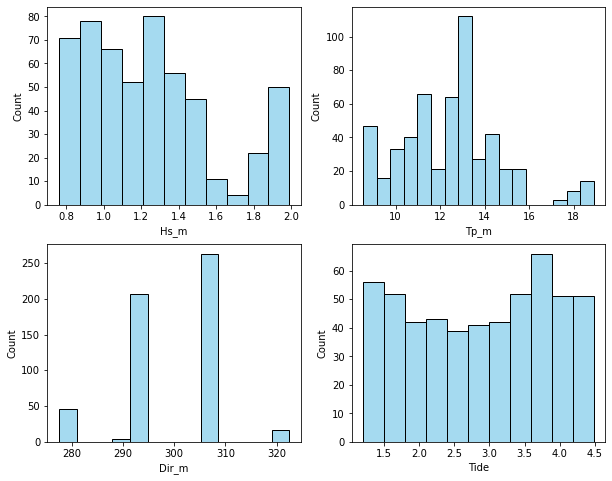

In [6]:
snap_df = final_df[final_df['Type_img'] == "snap"]
snap_df = snap_df.reset_index(drop=True)
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax=np.ravel(ax)
sns.histplot(data=snap_df, x="Hs_m", color="skyblue", ax=ax[0])
sns.histplot(data=snap_df, x="Tp_m", color="skyblue", ax=ax[1])
sns.histplot(data=snap_df, x="Dir_m", color="skyblue", ax=ax[2])
sns.histplot(data=snap_df, x="Tide", color="skyblue", ax=ax[3])

<AxesSubplot:xlabel='Tide', ylabel='Count'>

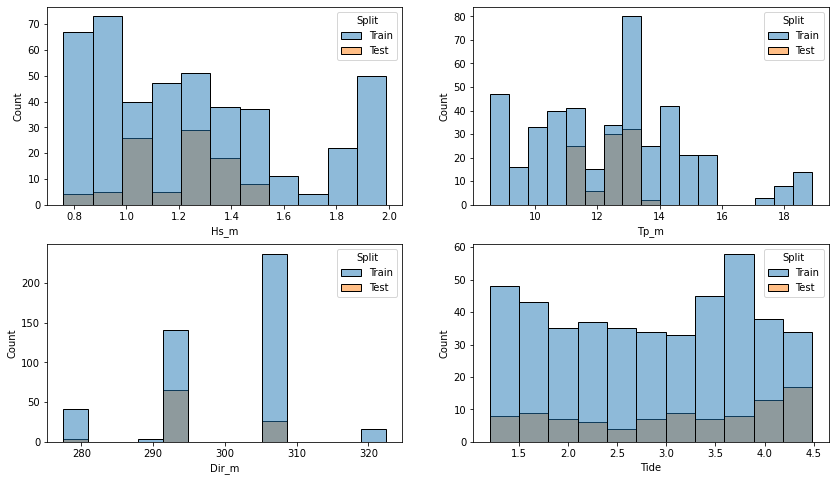

In [7]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax=np.ravel(ax)
sns.histplot(data=snap_df, x="Hs_m", color="skyblue",  hue='Split', ax=ax[0])
sns.histplot(data=snap_df, x="Tp_m", color="skyblue",  hue='Split', ax=ax[1])
sns.histplot(data=snap_df, x="Dir_m", color="skyblue",  hue='Split', ax=ax[2])
sns.histplot(data=snap_df, x="Tide", color="skyblue",  hue='Split', ax=ax[3])